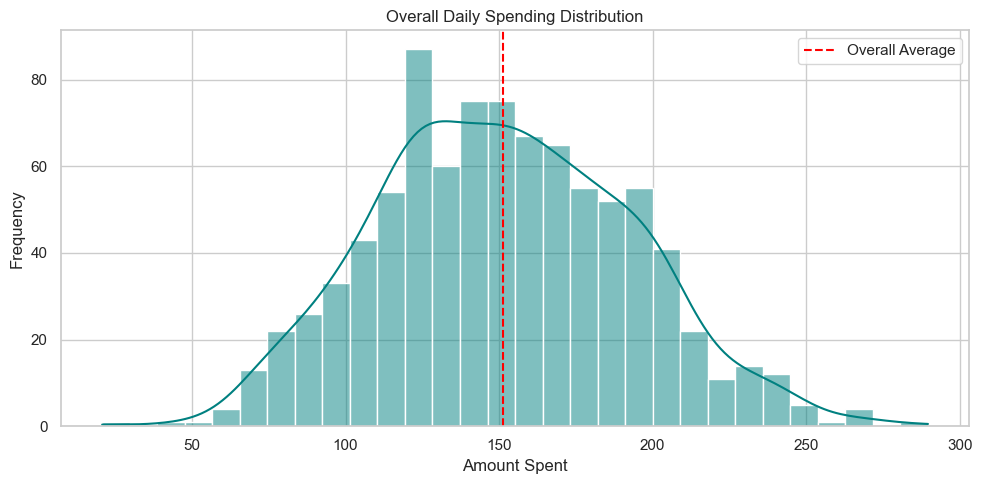

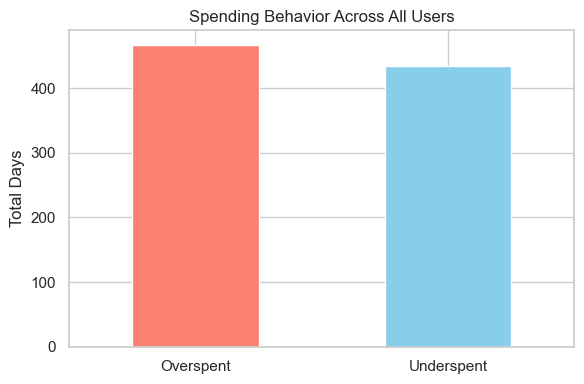

C:\Users\shubh\AppData\Local\Temp\ipykernel_29200\3106454668.py:80: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='User', y='Days_Overspent', data=top_overspenders, palette="Reds_r")


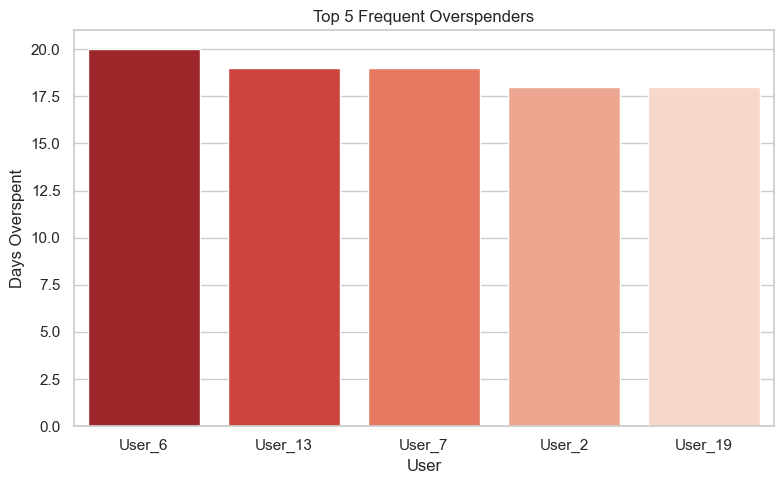

In [1]:
# spending_analysis.ipynb

# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plotting style
sns.set(style="whitegrid")

# -----------------------------
# 1. Simulate user expense data
# -----------------------------
np.random.seed(42)

# Create a dummy dataset for 30 users across 30 days
users = [f'User_{i}' for i in range(1, 31)]
dates = pd.date_range(start='2025-06-01', end='2025-06-30')

data = []

for user in users:
    daily_budget = np.random.randint(100, 200)
    for date in dates:
        spent = max(0, np.random.normal(loc=daily_budget, scale=30))
        data.append({
            'User': user,
            'Date': date,
            'Budget': daily_budget,
            'Spent': round(spent, 2)
        })

df = pd.DataFrame(data)

# -----------------------------
# 2. Calculate statistics
# -----------------------------

df['Overspent'] = df['Spent'] > df['Budget']
df['Underspent'] = df['Spent'] < df['Budget']
df['Exact Spend'] = df['Spent'] == df['Budget']

summary = df.groupby('User').agg({
    'Spent': ['mean', 'std'],
    'Overspent': 'sum',
    'Underspent': 'sum'
}).reset_index()

summary.columns = ['User', 'Avg_Spent', 'Std_Dev', 'Days_Overspent', 'Days_Underspent']

# -----------------------------
# 3. Visualization
# -----------------------------

# Overall average spending pattern
plt.figure(figsize=(10, 5))
sns.histplot(df['Spent'], bins=30, kde=True, color="teal")
plt.axvline(df['Spent'].mean(), color='red', linestyle='--', label='Overall Average')
plt.title('Overall Daily Spending Distribution')
plt.xlabel('Amount Spent')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.show()

# Comparison of overspending vs underspending
plt.figure(figsize=(6, 4))
spending_trend = df[['Overspent', 'Underspent']].sum()
spending_trend.plot(kind='bar', color=['salmon', 'skyblue'])
plt.title('Spending Behavior Across All Users')
plt.ylabel('Total Days')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Top 5 users who overspent most frequently
top_overspenders = summary.sort_values(by='Days_Overspent', ascending=False).head(5)
plt.figure(figsize=(8, 5))
sns.barplot(x='User', y='Days_Overspent', data=top_overspenders, palette="Reds_r")
plt.title('Top 5 Frequent Overspenders')
plt.ylabel('Days Overspent')
plt.tight_layout()
plt.show()

# -----------------------------
# 4. Export summary
# -----------------------------
summary.to_csv("user_spending_summary.csv", index=False)
